In [121]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.stats as stats
import seaborn as sns
from statsmodels.stats.power import TTestPower
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from itertools import combinations
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, LeaveOneOut
from statsmodels.stats.anova import anova_lm


### Problem 2, Confidence Intervals

In [3]:
DO = np.array([1.8, 2.0, 2.1, 1.7, 1.2, 2.3, 2.5, 2.9, 1.6, 2.2])
meanDO = np.mean(DO)
stdDO = np.std(DO)
n = len(DO)

#### i)

In [10]:
t_critical = stats.t.ppf(1- 0.025, df=n-1)
CI_mean = np.array((meanDO - t_critical * stdDO / np.sqrt(n), meanDO + t_critical * stdDO / np.sqrt(n)))
print('95% CI on the mean is:', CI_mean[0], CI_mean[1])

95% CI on the mean is: 1.7005472717146222 2.3594527282853783


#### ii)

In [13]:
margin_error = t_critical * stdDO / np.sqrt(n)

# New margin of error (10% reduction)
new_margin_error = 0.9 * margin_error

n_new = (t_critical * stdDO / new_margin_error) ** 2
n_new = float(np.ceil(n_new))
print('We would need', n_new, 'additional measurements')


We would need 13.0 additional measurements


#### iii)

In [15]:
median_DO = np.median(DO)

CI_median = np.percentile(DO, [2.5, 97.5])
print('CI on the median', 'lower bound is', CI_median[0], 'upper bound is', CI_median[1])

CI on the median lower bound is 1.29 upper bound is 2.81


#### iv)

In [16]:
#Per chapter 8, we use a chi squared distribution to find a confidence interval on the variance

In [18]:
# Chi-square critical values for 95% confidence
chi2_lower = stats.chi2.ppf(0.025, df=n-1)
chi2_upper = stats.chi2.ppf(0.975, df=n-1)

# Confidence interval for variance
CI_variance = ((n-1) * stdDO**2 / chi2_upper, (n-1) * stdDO**2 / chi2_lower)
CI_variance
print('CI on varaince', 'lower bound is', CI_variance[0], 'upper bound is', CI_variance[1])

CI on varaince lower bound is 0.10034817331557347 upper bound is 0.7068980234199121


#### v)

In [21]:
CI2 = (2.5, 3.2)

print('As the mean CI of the first set is 1.7, 2.4, and the mean CI of the second set 2.5, 3.2, we can say that with 95% confidence, the mean DO is different between the two sets')

As the mean CI of the first set is 1.7, 2.4, and the mean CI of the second set 2.5, 3.2, we can say that with 95% confidence, the mean DO is different between the two sets


### Problem 3: Hypothesis Testing

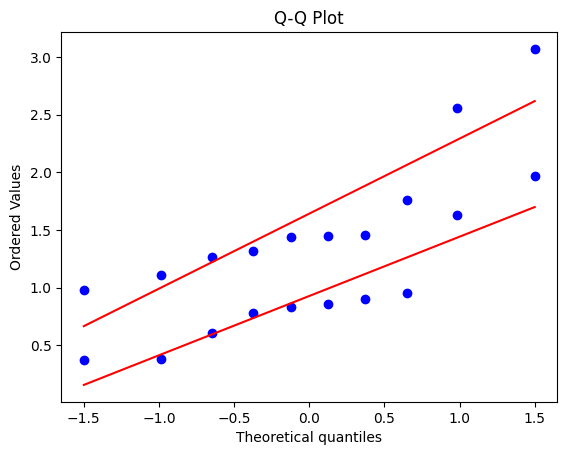

In [27]:
placebo = [0.90, 0.37, 1.63, 0.83, 0.95, 0.78, 0.86, 0.61, 0.38, 1.97]

alcohol = [1.46, 1.45, 1.76, 1.44, 1.11, 3.07, 0.98, 1.27, 2.56, 1.32]
stats.probplot(placebo, dist="norm", plot=plt)
stats.probplot(alcohol, dist="norm", plot=plt)


# Show the plot
plt.title("Q-Q Plot")
plt.show()
 

#### i) Does it appear that alc. consumption increases reaction time? 

In [30]:
#Null Hypothesis: u(alc) = u(placebo) for reaction time
#Alternate Hypothesis: u(alc) > u(placebo)
#Test Statistic: one tailed t test, we are trying to see if u(alc) > u(placebo)

t_stat, p_value = stats.ttest_ind(alcohol, placebo, equal_var=False, alternative='greater')

alpha = 0.05  
if p_value < alpha:
    result = "Reject H0: Alcohol increases reaction time."
else:
    result = "Fail to reject H0: No evidence that alcohol increases reaction time."

print("t-statistic:", t_stat)
print("p-value:", p_value)
print(result)
print('I ran this with equal and unequal variances, and the result is the same')

t-statistic: 2.6989405292993194
p-value: 0.00764501303496643
Reject H0: Alcohol increases reaction time.
I ran this with equal and unequal variances, and the result is the same


#### ii) Compare your results from (i) with an alternate test. For example, if you chose a nonparametric test in (i) then compare against a similair parametric alternative or vice versa

In [32]:
#t test is parametric. Ergo, we'll pick a nonparametric test for this part. Mann-Whitney will be used
# because it is a nonparametric test for the difference in two means and is used in the text as a comparison to the t-test

In [34]:
# Perform the Mann-Whitney U test
u_stat, p_value_mw = stats.mannwhitneyu(alcohol, placebo, alternative='greater')

if p_value_mw < alpha:
    result_mw = "Reject H0: Alcohol increases reaction time (Nonparametric test)."
else:
    result_mw = "Fail to reject H0: No evidence that alcohol increases reaction time."

print("U-statistic:", u_stat)
print("p-value (Mann-Whitney):", p_value_mw)
print(result_mw)
print('While both tests reject the null, Mann-Whitney is slightly more robust, i.e. has a lower p-value')

U-statistic: 85.0
p-value (Mann-Whitney): 0.004554248199015482
Reject H0: Alcohol increases reaction time (Nonparametric test).
While both tests reject the null, Mann-Whitney is slightly more robust, i.e. has a lower p-value


### iii) For the dta in problem 2, the mean DO is 2.03. If the mean DO exceeds 2.03 by as much as 0.42, is the sample size n = 10 adequate to ensure that the null
### hypothesis, H0: Mu = 2.03 will be rejected with probability of at least 0.8? This is a power of the test question

In [38]:

sigma = 0.5  
effect_size = 0.42 / sigma

# Perform power analysis
power_analysis = TTestPower()
power = power_analysis.solve_power(effect_size=effect_size, nobs=10, alpha=0.05, alternative='two-sided')

print("Power of the test:", power)
if power >= 0.8:
    print("The sample size n=10 is adequate for 80% power.")
else:
    print("The sample size n=10 is not adequate for 80% power.")
    print('The power of the test for this is 65.8%')


Power of the test: 0.6580812845530056
The sample size n=10 is not adequate for 80% power.
The power of the test for this is 65.8%


### Problem 4) Regression
- > Dependant Variable is Y = loght
- > Independant Variables are X = [lat, temp, rain, LAI, NPP, alt, lat, diurn.temp, long]
- > All rows with the hemisphere value (last column) of 1 corresponds to northern heisphere locations and -1 corresponds to southern hemisphere locations

In [113]:
p_heights = pd.read_csv('finals-prob4-data.csv')
p_heights_northern = p_heights[p_heights['hemisphere'] > 0]
p_heights_northern
Y = np.array(p_heights_northern['loght'])
X = p_heights_northern[['lat', 'temp', 'rain', 'LAI', 'NPP', 'alt', 'lat', 'diurn.temp', 'long']]
X = X.fillna(0)
print('Dr Balaji - there is missing data in this dataframe. I am filling with zeros just for ease, however the result may change if you were to, say take the mean of the column')

Dr Balaji - there is missing data in this dataframe. I am filling with zeros just for ease, however the result may change if you were to, say take the mean of the column


#### i) Find the best and next best models based on AIC or BIC for northern hemisphere. List your observations comparing the two models (Which are AIC or BIC values, the suite of selected independent variables, model coefficients)

In [95]:
# Assuming X and Y are your independent and dependent variables
columns = X.columns
names_final = []
aic_final = []  # Storing AIC for each combination
models_final = []  # Store fitted models

# Iterate over all possible combinations of columns (1 to len(columns))
for i in range(1, len(columns) + 1):
    combinations = itertools.combinations(columns, i)
    for combination in combinations:
        # Create a DataFrame with the selected columns from X
        subset_df = X[list(combination)]
        
        # Add a constant to the model (for the intercept)
        subset_df = sm.add_constant(subset_df)
        
        # Fit the OLS model
        model = sm.OLS(Y, subset_df).fit()
        
        # Store the AIC and model
        aic = model.aic
        names_final.append(combination)
        aic_final.append(aic)
        models_final.append(model)

# Convert results to a DataFrame
results_df = pd.DataFrame({'Combination': names_final, 'AIC': aic_final})
# print(results_df)

# Sort by AIC to get the best models (lower AIC is better)
sorted_results = results_df.sort_values(by='AIC').reset_index(drop=True)

# Get the best model (lowest AIC)
best_model_idx = sorted_results.index[0]
best_combination = sorted_results.iloc[0]['Combination']
best_model = models_final[best_model_idx]

# Get the next best model (second lowest AIC)
next_best_model_idx = sorted_results.index[1]
next_best_combination = sorted_results.iloc[1]['Combination']
next_best_model = models_final[next_best_model_idx]

# Print the best and next best model combinations and their AICs
print(f"Best Model (AIC: {sorted_results.iloc[0]['AIC']}): {best_combination}")
print(f"Next Best Model (AIC: {sorted_results.iloc[1]['AIC']}): {next_best_combination}")

# Retrieve the coefficients of the best and next best models
best_coefficients = best_model.params
next_best_coefficients = next_best_model.params

print("\nBest Model Coefficients:")
print(best_coefficients)

print("\nNext Best Model Coefficients:")
print(next_best_coefficients)



Best Model (AIC: 184.69187932373288): ('temp', 'rain')
Next Best Model (AIC: 185.37596621255216): ('temp', 'rain', 'LAI')

Best Model Coefficients:
const    1.360031
lat     -0.013063
lat     -0.013063
dtype: float64

Next Best Model Coefficients:
const   -0.238480
temp     0.049134
dtype: float64


#### ii) Check the significance of the model coefficients and, the model variance (ANOVA) for the best model.

In [80]:
predictors = ['temp', 'rain']
response = 'loght'
residuals_final = []
combo_names = []
for r in range(1, len(predictors) + 1):
    for combo in combinations(predictors, r):
        formula = f"{response} ~ {' + '.join(combo)}"
        model = smf.ols(formula=formula, data=p_heights_northern).fit()
        anova_results = sm.stats.anova_lm(model, typ=2)
        print(f"\nFormula: {formula}")
        # residuals = model.resid
        # combo_names.append(combo)
        # residuals_final
        print(anova_results)


Formula: loght ~ temp
             sum_sq    df          F        PR(>F)
temp      21.330356   1.0  36.392391  4.754940e-08
Residual  46.889705  80.0        NaN           NaN

Formula: loght ~ rain
             sum_sq    df          F        PR(>F)
rain      19.156788   1.0  31.236053  3.061598e-07
Residual  49.063274  80.0        NaN           NaN

Formula: loght ~ temp + rain
             sum_sq    df          F    PR(>F)
temp       6.626663   1.0  12.336197  0.000738
rain       4.453095   1.0   8.289882  0.005128
Residual  42.436610  79.0        NaN       NaN


### (iii) Perform model diagnostics including Cook's distance for the best model - comment on what you find

In [98]:
best_model_variables = p_heights_northern[['temp', 'rain']]
best_constant = sm.add_constant(best_model_variables)
best_mode_2 = sm.OLS(Y, best_constant).fit()

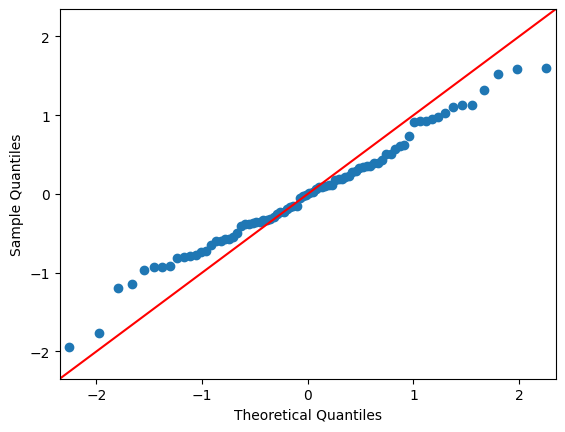

In [99]:
residuals = model.resid
sm.qqplot(residuals, line ='45')
plt.show()

#### Looks Normal!

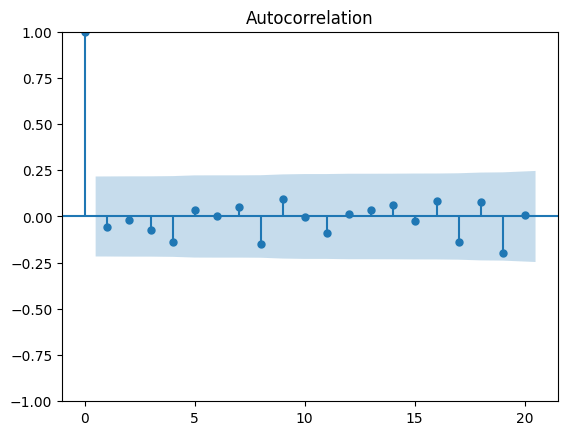

In [100]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals)
plt.show()

### Most residuals are indpendant. One autocorrelation. 

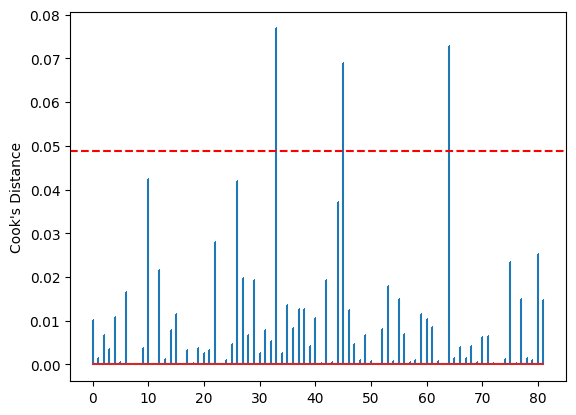

In [104]:
n = len(Y)
threshold = 4 / n
influence = model.get_influence()
cooks_d = influence.cooks_distance[0]
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",")
plt.axhline(y=threshold, color='r', linestyle='--', label=f'Threshold (4/n) = {threshold:.3f}')
plt.ylabel('Cook\'s Distance')
plt.show()

#### Only 3 data points are greater than the given threshold, telling us these have a large effect on the parameter estimates. Outside of a final exam, I'd go back and check these datapoints to see why they are having a disproportionate impact on the model fit. For now, because there are only 3, we can assume that the model is fine

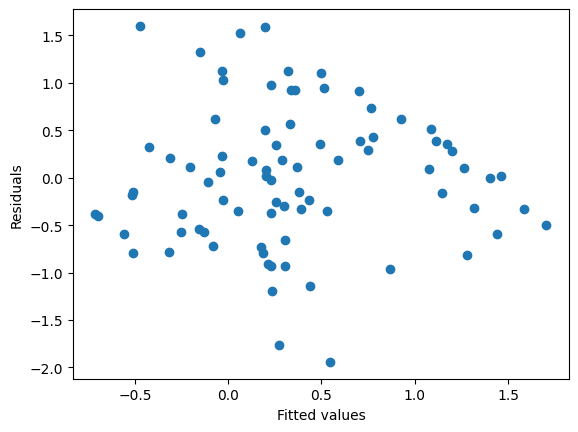

In [103]:
fitted_values = model.fittedvalues
plt.scatter(fitted_values, residuals)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

#### Looks like a random scatter, so constant variance can be assumed and the model assumptions are not violated

### (iv) Obtain drop-one (LOOCV) estimates for the best mode. Plot the actual Y vs. the predicted Y, along with a 1:1 line and compare with another plot the predicted values from the best model without LOOCV

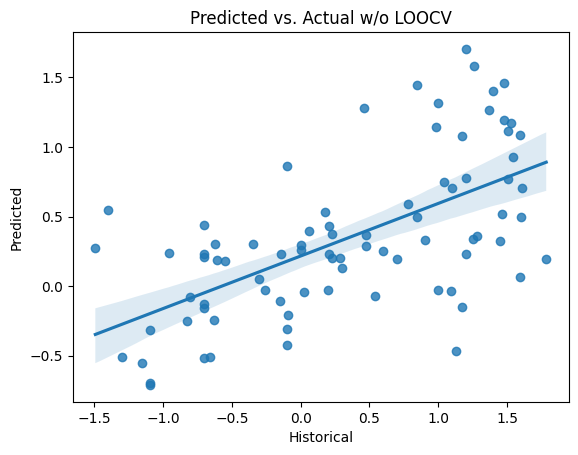

In [120]:
##Plot of Best Model W/0 LOOCV
Y = np.array(p_heights_northern['loght'])
best_model_variables = p_heights_northern[['temp', 'rain']]
best_constant = sm.add_constant(best_model_variables)
best_model_2 = sm.OLS(Y, best_constant).fit()
predictions = best_model_2.get_prediction(best_constant)
pred = predictions.predicted_mean
pred
sns.regplot(x = Y, y = pred)
plt.xlabel('Historical')
plt.ylabel('Predicted')
plt.title('Predicted vs. Actual w/o LOOCV')
plt.show()
